In [131]:
import numpy as np
import scipy
from scipy.optimize import minimize
import matplotlib
import matplotlib.pyplot as plt

In [132]:
dT = 1
lr = .25
lf = .25
a = -0.77
b = .231
R = 0.035

In [133]:
def f1(z,beta):
    return z[3]*np.cos(z[2]+beta)

def f2(z,beta):
    return z[3]*np.sin(z[2]+beta)

def f3(z,beta):
    return (z[3]/lr)*np.sin(beta)

def f4(z,beta,u):
    return R*(np.pi/2)*(a*z[3] + b*(u[0] - 1500))

def f5(u):
    return np.arctan((lr/(lr+lf))*np.tan(u[1]))





In [134]:
def kinematics(z,u,dT):
    beta = f5(u)
    z1 = z + np.array([f1(z,beta),f2(z,beta),f3(z,beta),f4(z,beta,u)])*dT
    return z1

In [135]:
t = np.linspace(0,10,10)
delta = np.ones(t.shape)*0.1 #np.sin(t)*(np.pi/6)
um = np.ones(t.shape)*1550
U = np.vstack((um,delta))
z0 = np.array([0,0,0,1])
Z = np.zeros((t.shape[0],4))
Z[0,:] = z0

for i in range(1,t.shape[0]):
    Z[i,:] = kinematics(Z[i-1,:],U[:,i-1],dT)

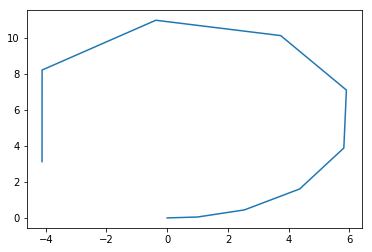

In [136]:
plt.plot(Z[:,0],Z[:,1])

In [155]:
def cost(UU):
    Zg = np.array([10,5,np.pi/2,1])
    
    dT = 1
    PredHor = 10
    U = UU.reshape((2,PredHor))
    Z = np.zeros((4,PredHor))
    Z[:,0] = np.array([0,0,0,1])
    
    for i in range(1,PredHor):
        Z[:,i] = kinematics(Z[:,i-1],U[:,i-1],dT)
        
    J = 0
    Q = np.array([[0,0],[0,1]])
    R = np.eye(4)*3
    R[3,3] = 0.5
    goalCrossed = False
    for j in range(0,PredHor):
        # Need To Add, If Z in Z free constraint
        zi = Z[:,j]
        ui = U[:,j]
        uabs = (np.absolute(ui - np.array([1500,0])))
        crossed = np.allclose(zi,Zg,atol=0.1)
        
        if uabs[0] <= 400 and uabs[1]<= np.pi/6:
            if crossed or goalCrossed:
                goalCrossed = True
                J += np.dot(ui - np.array([1500,0]),np.dot(Q,ui-np.array([1500,0])))
            else:
                J += np.dot(zi-Zg,np.dot(R,zi-Zg)) + np.dot(ui - np.array([1500,0]),np.dot(Q,ui-np.array([1500,0])))
        else: 
            return float('inf')
        
        ## IF GOAL IS REACHED CONSTRAINT NOT WORKING
        #if uabs[0] <= 400 and uabs[1]<= np.pi/6:
        #    if (np.allclose(zi,Zg,atol=0.1) == False) and goalCrossed == False: 
        #        J += 10000 + np.dot(ui - np.array([1500,0]),np.dot(Q,ui-np.array([1500,0])))
        #    elif goalCrossed == True:
        #        J += np.dot(ui,np.dot(Q,ui))
        #    elif (np.allclose(zi,Zg,atol=0.1)):
        #        goalCrossed = True
        #        J += np.dot(ui,np.dot(Q,ui))
        #else: 
        #    return float('inf')
    return J
        
        
        
    
    
    

In [156]:
UU = np.hstack((um,delta))
J = cost(UU)
print(J)

3192.431588929771


In [160]:
UUU =  minimize(cost, UU, method='nelder-mead', options={'maxiter' : 5000, 'disp': True})


In [161]:
Us = np.array(UUU.x).reshape((2,10))
print('final cost = ', cost(Us))
Z = np.zeros((4,10))
Z[:,0] = np.array([0,0,0,1])
    
for i in range(1,10):
    Z[:,i] = kinematics(Z[:,i-1],Us[:,i-1],1)

final cost =  791.2194059747059


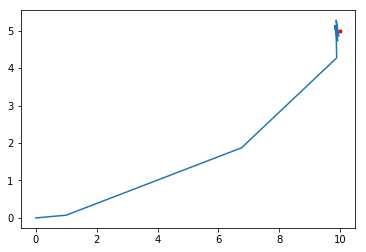

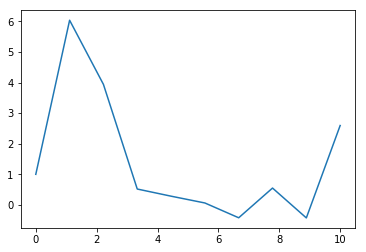

In [162]:
plt.plot(Z[0,:],Z[1,:],10,5,'r.')
plt.figure()
plt.plot(t,Z[3,:])